<a href="https://colab.research.google.com/github/ankitnagarsheth/aria/blob/master/whatsapp_chat_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud

matplotlib.style.use('ggplot')


In [0]:
def groupchat(whatsapp_nagarsheth):
    with open(whatsapp_nagarsheth, encoding="utf-8") as f:
        return f.read()

In [0]:
#store the text in chat...
chat = groupchat("whatsapp_nagarsheth")

In [7]:
date_pattern = r'\d+/\d+/\d+' #the date pattern
all_dates = re.findall((date_pattern), chat) #filter out all he dates
msg_dates = [] #to store the dates for messages messages alone
non_msg_dates = []  #to store the dates for actions
sender_msg = re.split((date_pattern), chat) #remove the date from the chats, left with only users and messages
sender = [] #to store users
msg = [] # to store messages alone
time = [] # to store time message was sent
nonMatch = [] # to store actions...
count = 0
for item in sender_msg:
    matchObj = re.match(r', (.*) - (.*): (.*)', item, re.DOTALL)
    if matchObj:
        msg_dates.append(all_dates[count-1])
        time.append(matchObj.group(1))
        sender.append(matchObj.group(2))
        msg.append(matchObj.group(3))
    else:
        non_msg_dates.append(all_dates[count])
        nonMatch.append(item)
    count = count + 1

IndexError: ignored

In [0]:
numpy_data = np.array([msg_dates, time, sender, msg])
numpy_data = numpy_data.transpose()
pd_data = pd.DataFrame(numpy_data, columns=["Date", "Time", "User", "Message"])

In [0]:
most_active_user = pd_data.User.value_counts()
most_active_date = pd_data.Date.value_counts()

In [0]:
def plot_wordcloud(msg):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(", ".join(msg))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
    img_path = "./wordcloud.png"
    wordcloud.to_file(img_path)

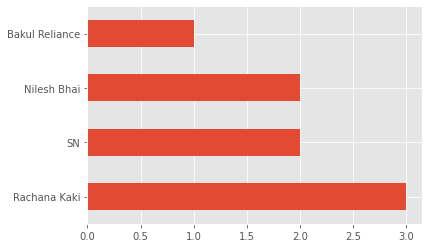

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2793 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2791 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2792 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2790 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2798 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2796 missing from current font.
  font.set_text(s

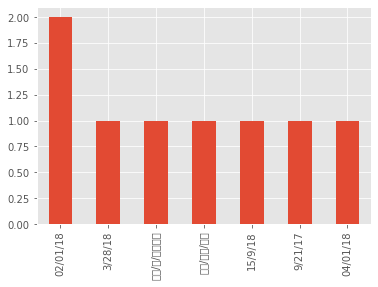

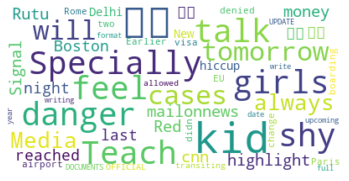

In [13]:
most_active_user[:20].plot(kind='barh')
plt.show()
most_active_date[:10].plot(kind='bar')
plt.show()
plot_wordcloud(msg)